In [1]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt

In [137]:
lattice = pb.Lattice(a1=[1, 0], a2=[0, 1])
N = 4
lattice.add_sublattices(
    ('A', np.array([1, 1])*1/N), ('B', np.array([-1, -1])*1/N), ('C', np.array([1, -1])*1/N), ('D', np.array([-1, 1])*1/N)  # add an atom called 'A' at position [0, 0]
)
t = 0.4
t2 = 1
lattice.add_hoppings(
    ([0, 0], 'A', 'D', t),
    ([0, 0], 'A', 'C', t),
    ([0, 0], 'B', 'C', t),
    ([0, 0], 'B', 'D', t),
    ([1, 1], 'A', 'B', t2),
    ([-1, 1], 'D', 'C', t2),

)

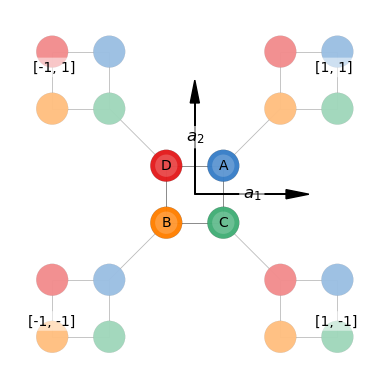

In [138]:
lattice.plot()
plt.gca().axis('off');

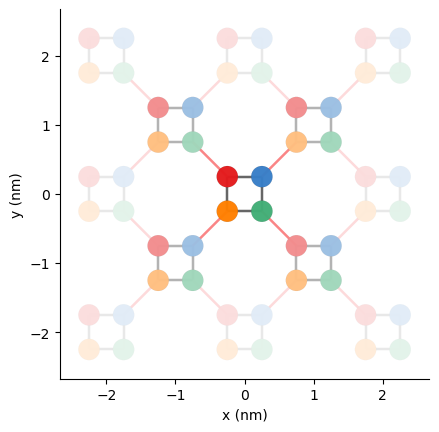

In [139]:
model = pb.Model(
    lattice,
    pb.translational_symmetry()
)

#model = pb.Model(
#    lattice,
#)
model.plot(num_periods=2,
          hopping = {
  "width": 3,
})

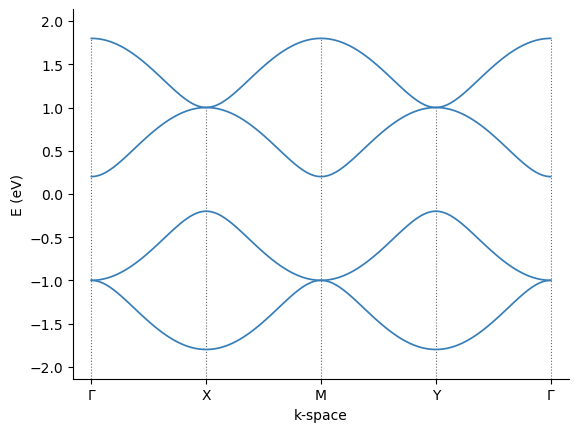

In [140]:
solver = pb.solver.lapack(model)
G1, G2 = lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
X = 1/2*G1
M = 1/2*G1+1/2*G2
Y = 1/2*G2
bands = solver.calc_bands(Gamma, X, M, Y, Gamma)
bands.plot(point_labels=[r'$\Gamma$', 'X', 'M', 'Y',  r'$\Gamma$'])

In [141]:
a1 = np.array([1, 0])
a2 = np.array([0, 1])

lattice = pb.Lattice(a1=a1, a2=a2)

N = 4
M = 20
cladding = 12
for i in range(-M, M):
    for j in range(-M, M):
        if abs(i) > cladding:
            continue
        if abs(j) > cladding: 
            continue
        lattice.add_sublattices(
            (f'A{i} {j}', np.array([1, 1])*1/N +i*a1+j*a2), (f'B{i} {j}', np.array([-1, -1])*1/N +i*a1+j*a2),
            (f'C{i} {j}', np.array([1, -1])*1/N+i*a1+j*a2), (f'D{i} {j}', np.array([-1, 1])*1/N+i*a1+j*a2))

In [142]:
for i in range(-M, M):
    for j in range(-M, M):
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'D{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'C{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'B{i} {j}', f'C{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'B{i} {j}', f'D{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'B{i+1} {j+1}', t2)
        except: 
            pass 
        try:
            lattice.add_one_hopping([0, 0], f'D{i} {j}', f'C{i-1} {j+1}', t2)
        except: 
            pass 

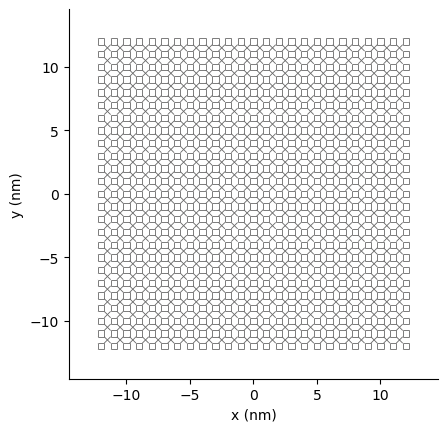

In [143]:
model = pb.Model(
    lattice,
)

model.plot()

In [144]:
solver = pb.solver.lapack(model)
bands = solver.eigenvalues

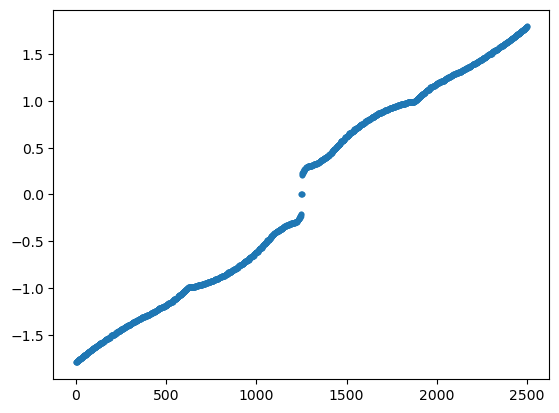

In [145]:
plt.scatter(range(0, np.size(bands)), bands, s=10)
#plt.ylim(-0.1, 0.1)
#plt.xlim(1247, 1252)

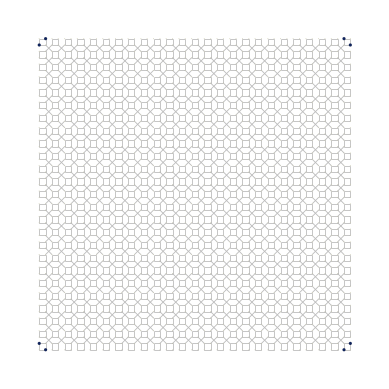

In [146]:
ldos = solver.calc_spatial_ldos(energy=0, broadening=0.01)  # eV
ldos.plot(site_radius=(0.03, 0.12))
plt.gca().axis('off');